# importing libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# loading and merging data


In [ ]:
data = pd.read_csv('IPL Player Stats - 2016 till 2019.csv')
data.head()

,Team,Player,Tournament,Matches,Batting Innings,Not Out,Runds Scored,Highest Score,Batting Average,Balls Faced,...,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,Delhi Daredevils,CH Morris,IPL 2016,12,7,4,195,82*,65.00,109,...,308,13,2/30,23.69,7.00,20.3,0,0,8,0
1,Delhi Daredevils,CH Morris,IPL 2017,9,9,4,154,52*,30.80,94,...,240,12,4/26,20.00,7.74,15.5,1,0,5,0
2,Delhi Daredevils,CH Morris,IPL 2018,4,4,3,46,27*,46.00,26,...,143,3,2/41,47.66,10.21,28.0,0,0,2,0
3,Delhi Daredevils,JP Duminy,IPL 2016,10,8,3,191,49*,38.20,156,...,55,2,1/4,27.50,7.85,21.0,0,0,3,0
4,Delhi Daredevils,Q de Kock,IPL 2016,13,13,1,445,108,37.08,327,...,-,-,-,-,-,-,-,-,2,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Team                  631 non-null    object
 1   Player                631 non-null    object
 2   Tournament            631 non-null    object
 3   Matches               631 non-null    int64 
 4   Batting Innings       631 non-null    object
 5   Not Out               631 non-null    object
 6   Runds Scored          631 non-null    object
 7   Highest Score         631 non-null    object
 8   Batting Average       631 non-null    object
 9   Balls Faced           631 non-null    object
 10  Batting Strike Rate   631 non-null    object
 11  100                   631 non-null    object
 12  50                    631 non-null    object
 13  0                     631 non-null    object
 14  4s                    631 non-null    object
 15  6s                    631 non-null    ob

In [ ]:
ipl = pd.read_csv('0y clean data pre ipl.csv')
ipl.head()

,Unnamed: 0,match_id,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wicket_type,player_dismissed,run,wickets,truns,y
0,0,335982,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0.0,1.0,,,1.0,0.0,1.0,68.0
1,1,335982,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,1.0,68.0
2,2,335982,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,1.0,,,1.0,0.0,2.0,68.0
3,3,335982,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,2.0,68.0
4,4,335982,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,2.0,68.0


In [ ]:
data['Player'].unique().shape
ipl['striker'].unique().shape
new_ipl = pd.merge(ipl,data,left_on='striker',right_on='Player')
new_ipl.drop(['wicket_type', 'player_dismissed','Unnamed: 0','match_id'],axis=1,inplace=True)
new_ipl.head()

,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,...,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,...,-,-,-,-,-,-,-,-,1,0
1,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,...,-,-,-,-,-,-,-,-,0,0
2,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,...,-,-,-,-,-,-,-,-,8,0
3,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,1.0,...,-,-,-,-,-,-,-,-,1,0
4,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,1.0,...,-,-,-,-,-,-,-,-,0,0


In [ ]:
#There are various ways to fill null values in our dataset. Here I am simply replacing the categorical values which are nan with ‘.’
a1 = new_ipl['venue'].unique()
a2 = new_ipl['batting_team'].unique()
a3 = new_ipl['bowling_team'].unique()
a4 = new_ipl['striker'].unique()
a5 = new_ipl['bowler'].unique()

def labelEncoding(data):
	dataset = pd.DataFrame(new_ipl)
	feature_dict ={}

	for feature in dataset:
		if dataset[feature].dtype==object:
			le = preprocessing.LabelEncoder()
			fs = dataset[feature].unique()
			le.fit(fs)
			dataset[feature] = le.transform(dataset[feature])
			feature_dict[feature] = le

	return dataset

labelEncoding(new_ipl)


,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,...,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,15,1,0.2,7,13,13,164,197,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,15,1,0.2,7,13,13,164,197,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,15,1,0.2,7,13,13,164,197,0.0,0.0,...,0,0,0,0,0,0,0,0,8,0
3,15,1,0.3,7,13,13,164,197,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
4,15,1,0.3,7,13,13,164,197,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75403,8,1,6.2,13,7,4,193,20,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
75404,8,1,6.6,13,7,4,193,20,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
75405,8,1,6.6,13,7,4,193,20,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
75406,8,1,6.6,13,7,4,193,20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_ipl["y"]

0        68.0
1        68.0
2        68.0
3        68.0
4        68.0
         ... 
75403    47.0
75404    47.0
75405    47.0
75406    47.0
75407    47.0
Name: y, Length: 75408, dtype: float64

In [ ]:
#feature engineering and selection
X = new_ipl[['venue', 'innings','batting_team',
			'bowling_team', 'striker','bowler']].values
y = new_ipl['y'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=25,verbose=1, mode='min',)

In [ ]:
model = Sequential()

model.add(Dense(43, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(22, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(11, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')


In [ ]:
model.fit(x=X_train, y=y_train, epochs=400,
		validation_data=(X_test,y_test),
		callbacks=[early_stop] )


Epoch 1/400
1579/1579 [==============================] - 6s 3ms/step - loss: 888.1857 - val_loss: 238.9232
Epoch 2/400
1579/1579 [==============================] - 4s 3ms/step - loss: 638.8939 - val_loss: 230.7533
Epoch 3/400
1579/1579 [==============================] - 5s 3ms/step - loss: 581.9759 - val_loss: 233.0634
Epoch 4/400
1579/1579 [==============================] - 4s 3ms/step - loss: 526.7111 - val_loss: 219.8219
Epoch 5/400
1579/1579 [==============================] - 5s 3ms/step - loss: 486.9001 - val_loss: 204.5768
Epoch 6/400
1579/1579 [==============================] - 5s 3ms/step - loss: 457.4633 - val_loss: 204.1646
Epoch 7/400
1579/1579 [==============================] - 4s 3ms/step - loss: 429.7073 - val_loss: 192.8771
Epoch 8/400
1579/1579 [==============================] - 5s 3ms/step - loss: 405.5547 - val_loss: 185.8782
Epoch 9/400
1579/1579 [==============================] - 4s 3ms/step - loss: 387.3860 - val_loss: 177.1111
Epoch 10/400
1579/1579 [=============

<Axes: >

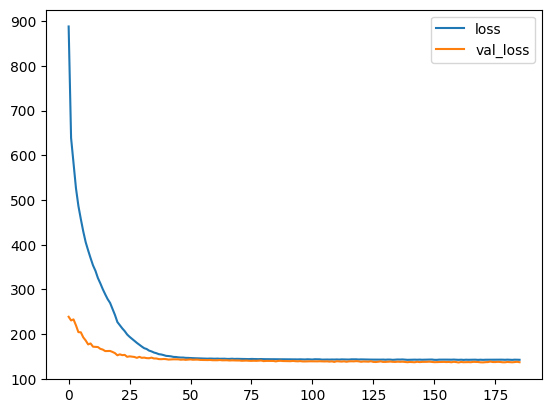

In [ ]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [ ]:
predictions = model.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score
mean_absolute_error(y_test,predictions)
# Mean absolute error regression loss

778/778 [==============================] - 1s 1ms/step


9.20765280467764

In [ ]:

np.sqrt(mean_squared_error(y_test,predictions))
# Mean squared error regression loss.


11.717868510018217

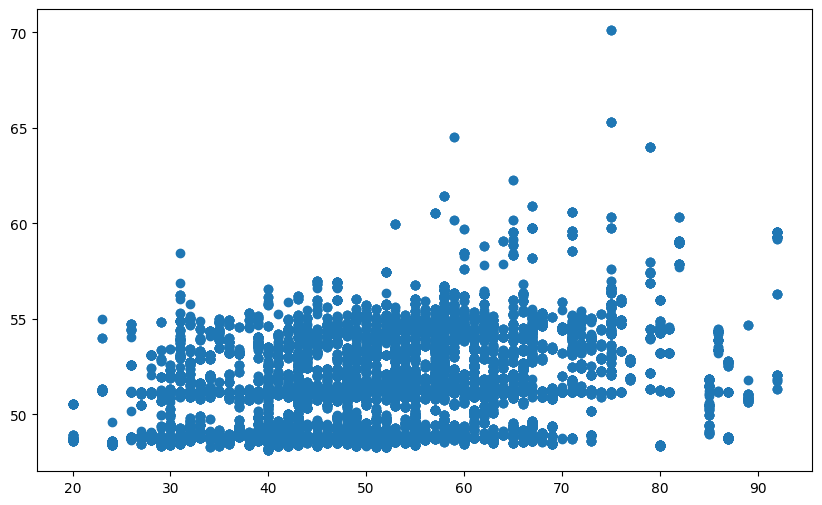

In [ ]:

plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions)